In [15]:
import fitz  
import re
from collections import defaultdict
import matplotlib.pyplot as plt

import sys
sys.path.append('../common/')
from common import *


file_path = '2019-AL-GEN.pdf'
doc = fitz.open(file_path)


text = ''
for page in doc:
    text += page.get_text()

text[:1000]  


'2019 RESULTS: GCE ADVANCED LEVEL GENERAL\nCentre No:  11001 Buea External  \nRegist: 167, Sat for 2 or more Subjects: 149, Passed : 75\n% Passed : 50.34, Sanctioned : 4\nResults of Successful Candidates In Order Of Merit\nPassed In 4 Subjects: 4\nMOJOKO LYSETTE MBENE ECO-D,ENG-C,LIT-E,HIS-E\n(1)\nEKILI FERDINAND ACHA ECO-D,GEO-D,HIS-D,PHI-E\n(2)\nBIN BRENDA SIH ECO-E,ENG-D,LIT-E,HIS-C\n(3)\nMOSUME MARTHA NASAKO ECO-D,ENG-E,GEO-E,HIS-D\n(4)\nPassed In 3 Subjects: 35\nAGBORTAEYONG  ARREY ECO-A,GEO-C,PMS-A\n(1)\nWIRBA MARIYAMU LEINYUY FSN-C,HIS-C,PHI-B\n(2)\nMIRANDA LEKUNGA FOTACHWI ENG-B,FSN-D,HIS-B\n(3)\nNTAMBI SONE EBOKOLLE GEO-C,HIS-B,REL-D\n(4)\nFABRICE FRU NGAN KINDZEKA ENG-C,LIT-D,HIS-C\n(5)\nISABELLA MUNGFU ECO-E,HIS-C,PHI-B\n(6)\nEDIMEJANG NDIE HERBERT ECO-D,GEO-C,HIS-C\n(7)\nTARNTEH RASHIDATU YEWOHBENYI ECO-C,GEO-E,HIS-B\n(8)\nNGWA PRYDE SHU ECO-D,HIS-B,PHI-E\n(9)\n(10) ANAKALA BLAISE FUKALA ECO-E,FSN-D,HIS-C\n(11) ESEH AKIDE MARILYN EKUSU ECO-C,GEO-E,HIS-D\n(12) WERETAI COLLIN

In [16]:
pattern = re.compile(r'\(\d+\)\s+([A-Z\s]+)\s*([A-Z]{3,5}-[A-E](?:,\s*[A-Z]{3,5}-[A-E])*)\s*\n')

In [17]:
candidates = pattern.findall(text)
dict_candidates = { candidate[0].strip(): Record(candidate) for candidate in candidates }
grade_distribution = defaultdict(GradeDist)
# Summary of candidates
print(f"Total number of candidates: {len(dict_candidates)}")

Total number of candidates: 20291


In [18]:
def top_n_percent(grade_distribution, grade):
    total_candidates = len(dict_candidates)
    candidates_considered = 0
    while grade <= 25:
        candidates_considered += grade_distribution[grade].count
        grade += 1
    return candidates_considered / (total_candidates*100/70) * 100 # accounting for 70% failure rate

In [19]:


for ind, candidate in enumerate(dict_candidates):
    if ind == 10:
        break
    print(candidate, dict_candidates[candidate])

EKILI FERDINAND ACHA GPA: 1.75 | 7 points -> {'ECO': 'D', 'GEO': 'D', 'HIS': 'D', 'PHI': 'E'}
BIN BRENDA SIH GPA: 1.75 | 7 points -> {'ECO': 'E', 'ENG': 'D', 'LIT': 'E', 'HIS': 'C'}
MOSUME MARTHA NASAKO GPA: 1.50 | 6 points -> {'ECO': 'D', 'ENG': 'E', 'GEO': 'E', 'HIS': 'D'}
WIRBA MARIYAMU LEINYUY GPA: 3.33 | 10 points -> {'FSN': 'C', 'HIS': 'C', 'PHI': 'B'}
MIRANDA LEKUNGA FOTACHWI GPA: 3.33 | 10 points -> {'ENG': 'B', 'FSN': 'D', 'HIS': 'B'}
NTAMBI SONE EBOKOLLE GPA: 3.00 | 9 points -> {'GEO': 'C', 'HIS': 'B', 'REL': 'D'}
FABRICE FRU NGAN KINDZEKA GPA: 2.67 | 8 points -> {'ENG': 'C', 'LIT': 'D', 'HIS': 'C'}
ISABELLA MUNGFU GPA: 2.67 | 8 points -> {'ECO': 'E', 'HIS': 'C', 'PHI': 'B'}
EDIMEJANG NDIE HERBERT GPA: 2.67 | 8 points -> {'ECO': 'D', 'GEO': 'C', 'HIS': 'C'}
TARNTEH RASHIDATU YEWOHBENYI GPA: 2.67 | 8 points -> {'ECO': 'C', 'GEO': 'E', 'HIS': 'B'}


<BarContainer object of 24 artists>

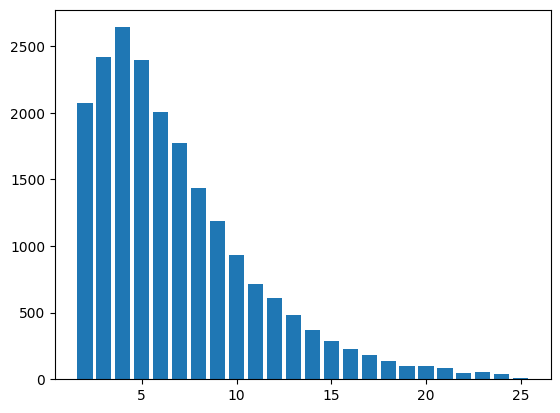

In [20]:
grade_distribution = defaultdict(GradeDist)
for candidate in dict_candidates:
    grade_distribution[dict_candidates[candidate].points].add(candidate)

plt.bar(grade_distribution.keys(), [grade_distribution[key].count for key in grade_distribution.keys()])

In [21]:
print("Points \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(grade_distribution.keys(), reverse=True):
    print(f"{key}\t: \t\t{grade_distribution[key]} \t\t: \t\t{top_n_percent(grade_distribution, key):.2f}%")

Points 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
25	: 		10 		: 		0.03%
24	: 		36 		: 		0.16%
23	: 		55 		: 		0.35%
22	: 		49 		: 		0.52%
21	: 		81 		: 		0.80%
20	: 		97 		: 		1.13%
19	: 		101 		: 		1.48%
18	: 		137 		: 		1.95%
17	: 		180 		: 		2.57%
16	: 		227 		: 		3.36%
15	: 		289 		: 		4.35%
14	: 		370 		: 		5.63%
13	: 		484 		: 		7.30%
12	: 		609 		: 		9.40%
11	: 		712 		: 		11.86%
10	: 		934 		: 		15.08%
9	: 		1184 		: 		19.16%
8	: 		1435 		: 		24.11%
7	: 		1771 		: 		30.22%
6	: 		2004 		: 		37.14%
5	: 		2395 		: 		45.40%
4	: 		2641 		: 		54.51%
3	: 		2417 		: 		62.85%
2	: 		2073 		: 		70.00%


In [22]:
## All 25 points candidates

print(f"Total {grade_distribution[25].count} candidates with 25 points")
print(f"Candidates with 25 points(top {top_n_percent(grade_distribution, 25):.2f}%):")
for candidate in grade_distribution[25].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 10 candidates with 25 points
Candidates with 25 points(top 0.03%):
	 KOMOFOR NIKENZE                	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 MBINKAR EMMANUEL FONDZENYUY JU 	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 MOTO NKOUAYIEP ARIELLE AUDE    	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 KAMDA TEZEBO DIBREY JONATHAN   	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 ZETANG CLINTON FOSSIMOCK       	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 DZOSSA FOKOU MIKE GODWILL      	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A'}
	 EWODO MBEZELE PIERRE BERTRIED  	 GPA: 5.00 | 25 points -> {'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'A', 'CSC': 'A'}
	 FEUWO BIBIANG EPHREIM          	 GPA: 5.00 | 25 points -> {'BIO': 'A', 'CHE': 

In [23]:
## All 24 points candidates

print(f"Total {grade_distribution[24].count} candidates with 24 points")
print(f"Candidates with 24 points(top {top_n_percent(grade_distribution, 24):.2f}%):")
for candidate in grade_distribution[24].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 36 candidates with 24 points
Candidates with 24 points(top 0.16%):
	 DONGMO ANGE MERVEILLE          	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 TEBOH TEBOH RYRAN SHALANYUY    	 GPA: 4.80 | 24 points -> {'ECO': 'A', 'ENG': 'B', 'GEO': 'A', 'HIS': 'A', 'PHI': 'A'}
	 ANGWAH WICLIFF TAH             	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 ANYE TCHOULI CALNE FORKOB      	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 NOUMDA FOTSING FRANCK RONADINI 	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 SIKATI SOUOP INESSE            	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 LAMBOU FOLA RAPHAELLA ROSE     	 GPA: 4.80 | 24 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'B'}
	 MBAH TCHATEGOUANG ARCHANGE     	 GPA: 4.80 | 24 points -> {'BIO': 'B', 'CHE': 

In [24]:
## All 23 points candidates

print(f"Total {grade_distribution[23].count} candidates with 23 points")
print(f"Candidates with 23 points(top {top_n_percent(grade_distribution, 23):.2f}%):")
for candidate in grade_distribution[23].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 55 candidates with 23 points
Candidates with 23 points(top 0.35%):
	 WAMBA NGUESSONG ARCELLE EDOUAD 	 GPA: 4.60 | 23 points -> {'BIO': 'B', 'CHE': 'A', 'PMM': 'A', 'FMA': 'A', 'PHY': 'B'}
	 NANGWOU DJOUNANG SHENNEL       	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 TACHANG LIZA VETMIA            	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'B'}
	 NGWA ZIE BRITNEY               	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'B'}
	 ETA KELLY ETA                  	 GPA: 4.60 | 23 points -> {'ECO': 'A', 'ENG': 'A', 'LIT': 'B', 'HIS': 'B', 'PHI': 'A'}
	 BRICE FORGHAB                  	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'C', 'PHY': 'A'}
	 ATEAFAC KLAUSTEVIE             	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'C', 'PHY': 'A'}
	 NDOP BORIS MUSONG              	 GPA: 4.60 | 23 points -> {'BIO': 'A', 'CHE': 

In [25]:
## All 22 points candidates

print(f"Total {grade_distribution[22].count} candidates with 22 points")
print(f"Candidates with 22 points(top {top_n_percent(grade_distribution, 22):.2f}%):")
for candidate in grade_distribution[22].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 49 candidates with 22 points
Candidates with 22 points(top 0.52%):
	 MAKOGE ALDRINE EWANE           	 GPA: 4.40 | 22 points -> {'BIO': 'B', 'CHE': 'A', 'PMM': 'A', 'FMA': 'C', 'PHY': 'A'}
	 NYAMBI VANESSIA ADINGUM        	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'B', 'PHY': 'B'}
	 FOMONYUYTAR JOSEPH             	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'C', 'PHY': 'A'}
	 KAMGO NJOMO ELTON              	 GPA: 4.40 | 22 points -> {'CHE': 'A', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A', 'CSC': 'C'}
	 NDALEH NCHUMI SAH              	 GPA: 4.40 | 22 points -> {'BIO': 'B', 'CHE': 'A', 'PMM': 'A', 'FMA': 'C', 'PHY': 'A'}
	 CHINDO BRENDALINE NGOINTOAH    	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'A', 'PMS': 'A', 'PHY': 'C', 'ICT': 'B'}
	 NGU TCHOUALA YANE              	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'D', 'PHY': 'A'}
	 TCHEUWE MICLANCHE ANESTA       	 GPA: 4.40 | 22 points -> {'BIO': 'A', 'CHE': 

In [26]:
## All 21 points candidates

print(f"Total {grade_distribution[21].count} candidates with 21 points")
print(f"Candidates with 21 points(top {top_n_percent(grade_distribution, 21):.2f}%):")
for candidate in grade_distribution[21].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 81 candidates with 21 points
Candidates with 21 points(top 0.80%):
	 DONFACK NGOUFACK LYSAN MORELLI 	 GPA: 4.20 | 21 points -> {'BIO': 'C', 'CHE': 'B', 'PMM': 'A', 'FMA': 'B', 'PHY': 'A'}
	 TENDONGFOR YIMNAI NAOMY TENKIA 	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'FMA': 'D', 'PHY': 'B'}
	 NKENG JUNIOR BEZA              	 GPA: 4.20 | 21 points -> {'ECO': 'A', 'GEO': 'A', 'HIS': 'B', 'REL': 'C', 'PHI': 'B'}
	 TANIFORM KEZIAH AMBIFUH        	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'C', 'PHY': 'B'}
	 YEE TATIANA YUFUIY             	 GPA: 4.20 | 21 points -> {'ECO': 'B', 'GEO': 'A', 'PMS': 'C', 'REL': 'A', 'ICT': 'B'}
	 ANONG REGINA GABRIELLA FOMBEN  	 GPA: 4.20 | 21 points -> {'BIO': 'A', 'CHE': 'A', 'PMM': 'A', 'PHY': 'B', 'CSC': 'D'}
	 BI STEFANIE AMBENGWA           	 GPA: 4.20 | 21 points -> {'ECO': 'A', 'ENG': 'B', 'GEO': 'C', 'HIS': 'B', 'REL': 'A'}
	 NJUNCHOP BONIS NKENGFACK       	 GPA: 4.20 | 21 points -> {'BIO': 'B', 'CHE': 

In [27]:
## All 20 points candidates

print(f"Total {grade_distribution[20].count} candidates with 20 points")
print(f"Candidates with 20 points(top {top_n_percent(grade_distribution, 20):.2f}%):")
for candidate in grade_distribution[20].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 97 candidates with 20 points
Candidates with 20 points(top 1.13%):
	 TAM GUEMMEGNE MEGANE PRISCILLE 	 GPA: 4.00 | 20 points -> {'BIO': 'B', 'CHE': 'B', 'PMM': 'B', 'FMA': 'C', 'PHY': 'A'}
	 NDAH RUTH KAH                  	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'B', 'PMM': 'A', 'FMA': 'D', 'PHY': 'B'}
	 OBEN  WILSON EWUBE             	 GPA: 4.00 | 20 points -> {'BIO': 'A', 'CHE': 'C', 'PMM': 'A', 'FMA': 'C', 'PHY': 'B'}
	 JINGWI CARLSON BOBUIN          	 GPA: 4.00 | 20 points -> {'BIO': 'B', 'CHE': 'B', 'FSN': 'B', 'PMM': 'A', 'PHY': 'C'}
	 KOME BRANDON EKEME             	 GPA: 4.00 | 20 points -> {'ECO': 'C', 'GEO': 'A', 'HIS': 'B', 'REL': 'B', 'PHI': 'B'}
	 WONJI MAGRETTA AWETUA          	 GPA: 4.00 | 20 points -> {'ECO': 'C', 'ENG': 'A', 'LIT': 'B', 'HIS': 'B', 'PHI': 'B'}
	 FOMENKY JASON EWANE            	 GPA: 4.00 | 20 points -> {'ECO': 'B', 'ENG': 'A', 'GEO': 'B', 'HIS': 'B', 'ICT': 'C'}
	 PRINCEWILL CHIEBUKA CHIJIOKE   	 GPA: 4.00 | 20 points -> {'BIO': 'B', 'CHE': 

In [28]:
## All 19 points candidates

print(f"Total {grade_distribution[19].count} candidates with 19 points")
print(f"Candidates with 19 points(top {top_n_percent(grade_distribution, 19):.2f}%):")
for candidate in grade_distribution[19].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 101 candidates with 19 points
Candidates with 19 points(top 1.48%):
	 KONANG GINYU SYLVIE            	 GPA: 3.80 | 19 points -> {'ENG': 'B', 'LIT': 'B', 'SBEF': 'C', 'HIS': 'C', 'PHI': 'A'}
	 SUCCESS NGEKE MAFANY           	 GPA: 3.80 | 19 points -> {'BIO': 'A', 'CHE': 'C', 'GGY': 'C', 'PMM': 'B', 'PHY': 'B'}
	 FONGANG NGAH FONGANG           	 GPA: 3.80 | 19 points -> {'BIO': 'C', 'CHE': 'C', 'PMM': 'A', 'FMA': 'C', 'PHY': 'A'}
	 EWAH NAOMI ANCHI               	 GPA: 3.80 | 19 points -> {'ENG': 'B', 'LIT': 'C', 'FRE': 'C', 'HIS': 'B', 'PHI': 'A'}
	 NJAMUTOH BRENDA BOHTI          	 GPA: 3.80 | 19 points -> {'BIO': 'B', 'CHE': 'C', 'PMM': 'A', 'FMA': 'C', 'PHY': 'B'}
	 NDIWAGO MOUTAPHA NCHUPOK       	 GPA: 3.80 | 19 points -> {'CHE': 'C', 'PMM': 'A', 'FMA': 'C', 'PHY': 'B', 'CSC': 'B'}
	 CLETIVO NKUMBE WOUM            	 GPA: 3.80 | 19 points -> {'BIO': 'C', 'CHE': 'A', 'PMM': 'B', 'PHY': 'C', 'REL': 'B'}
	 MBURLI RODRICK TATA            	 GPA: 3.80 | 19 points -> {'CHE': 'C', 'PMM'